# Is there a correlation between the magnitude of an earthquake and the amount of tweets sent within 48 hours?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

In [3]:
conn = psycopg2.connect(
    host="dbprojecteq.cefqf86eooid.us-east-1.rds.amazonaws.com",
    database="dbeq",
    user="iaschwen",
    password="")

In [4]:
cur = conn.cursor()

## Quakes

In [5]:
cur.execute('SELECT * FROM quakes')

In [7]:
quakes = pd.DataFrame(cur.fetchall())

In [9]:
# All quakes in one pandas df
quakes.head(4)

,0,1,2,3,4,5,6,7
0,usp000hsb2,5.0,1293744150350,earthquake,"M 5.0 - 108 km WSW of Isangel, Vanuatu",168.3530,-19.9840,None
1,usp000hsax,5.0,1293738996380,earthquake,"M 5.0 - 156 km WSW of Severo-Kuril’sk, Russia",153.9640,50.3800,None
2,ak010gqb24bq,5.0,1293736886463,earthquake,"M 5.0 - 113 km SE of Ugashik, Alaska",-156.1674,56.7391,None
3,usp000hsah,5.0,1293728174930,earthquake,"M 5.0 - 21 km NE of Pilar, Philippines",126.2490,9.9890,None


In [26]:
quakes['date'] = pd.to_datetime(quakes[2],unit='ms')

## Tweets

In [17]:
cur.execute('SELECT * FROM tweetcount')

In [18]:
tweetcount = pd.DataFrame(cur.fetchall(), columns=['start','end','count'])

In [30]:
# All tweetcounts in one pandas df
tweetcount.head(4)

,start,end,count,date
0,2021-09-30T00:00:00.000Z,2021-10-01T00:00:00.000Z,3037,2021-09-30 00:00:00+00:00
1,2021-10-01T00:00:00.000Z,2021-10-02T00:00:00.000Z,2475,2021-10-01 00:00:00+00:00
2,2021-10-02T00:00:00.000Z,2021-10-03T00:00:00.000Z,4769,2021-10-02 00:00:00+00:00
3,2021-10-03T00:00:00.000Z,2021-10-04T00:00:00.000Z,2843,2021-10-03 00:00:00+00:00


In [47]:
tweetcount['date'] = pd.to_datetime(tweetcount['start'])#.strftime('%Y-%m-%d')

In [48]:
tweetcount['DateStr'] = tweetcount['date'].dt.strftime('%Y-%m-%d')


## Merge these two dataframes

In [50]:
tweetcount.tail(1)

,start,end,count,date,DateStr
3955,2011-01-19T00:00:00.000Z,2011-01-20T00:00:00.000Z,7516,2011-01-19 00:00:00+00:00,2011-01-19


In [55]:
quakes.iloc[5000]['date'].strftime('%Y-%m-%d')

'2011-01-13'

In [61]:
tweetcount[tweetcount['DateStr']>=quakes.iloc[5000]['date'].strftime('%Y-%m-%d')].sort_values('start').head(2)['count'].sum()

10259

In [64]:
def getNrTweets(date):
    date = date.strftime('%Y-%m-%d')
    return tweetcount[tweetcount['DateStr']>=date].sort_values('start').head(2)['count'].sum()
    #return 0

quakes['tweetcount'] = quakes.apply(lambda row: getNrTweets(row['date']), axis=1)

In [65]:
quakes

,0,1,2,3,4,5,6,7,date,tweetcount
0,usp000hsb2,5.0,1293744150350,earthquake,"M 5.0 - 108 km WSW of Isangel, Vanuatu",168.3530,-19.9840,None,2010-12-30 21:22:30.350,9819
1,usp000hsax,5.0,1293738996380,earthquake,"M 5.0 - 156 km WSW of Severo-Kuril’sk, Russia",153.9640,50.3800,None,2010-12-30 19:56:36.380,9819
2,ak010gqb24bq,5.0,1293736886463,earthquake,"M 5.0 - 113 km SE of Ugashik, Alaska",-156.1674,56.7391,None,2010-12-30 19:21:26.463,9819
3,usp000hsah,5.0,1293728174930,earthquake,"M 5.0 - 21 km NE of Pilar, Philippines",126.2490,9.9890,None,2010-12-30 16:56:14.930,9819
4,usp000hsaa,5.6,1293719814560,earthquake,"M 5.6 - 47 km WSW of Lata, Solomon Islands",165.3760,-10.8190,None,2010-12-30 14:36:54.560,9819
...,...,...,...,...,...,...,...,...,...,...
21816,us6000d3xn,5.7,1609225829079,earthquake,"M 5.7 - 212 km W of Bandon, Oregon",-126.9951,43.3890,None,2020-12-29 07:10:29.079,25780
21817,us6000d3x8,5.4,1609223009769,earthquake,"M 5.4 - 92 km W of Panguna, Papua New Guinea",154.6521,-6.3985,None,2020-12-29 06:23:29.769,25780
21818,us6000d3xi,5.0,1609222744705,earthquake,"M 5.0 - 92 km W of Panguna, Papua New Guinea",154.6586,-6.4549,None,2020-12-29 06:19:04.705,25780
21819,us6000d3x5,5.1,1609222417216,earthquake,"M 5.1 - 90 km WSW of Panguna, Papua New Guinea",154.6909,-6.4950,None,2020-12-29 06:13:37.216,25780


## Plot the correlation

Text(0, 0.5, 'Magnitude')

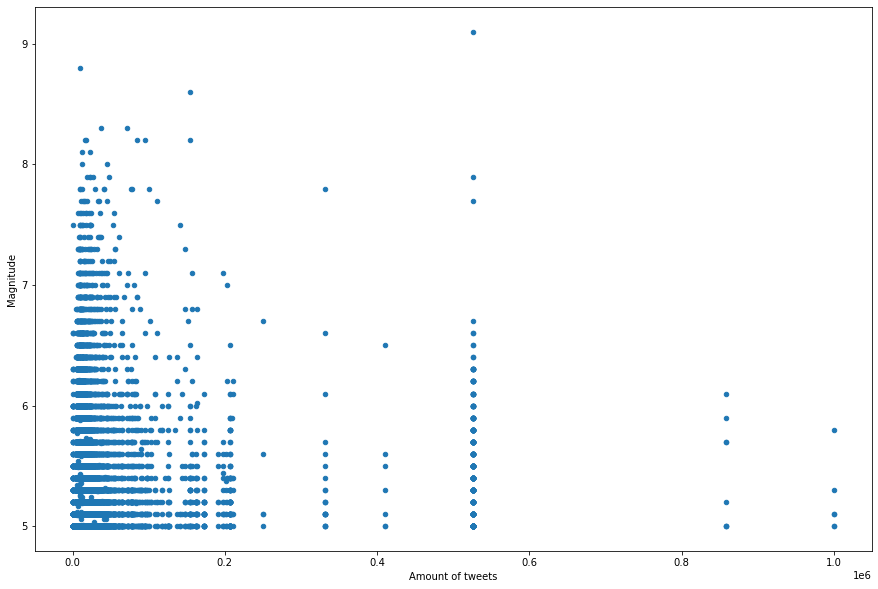

In [77]:
# All tweets and all magnitudes
ax = quakes.plot(x='tweetcount', y=1, kind='scatter', figsize=(15,10))
ax.set_xlabel('Amount of tweets')
ax.set_ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

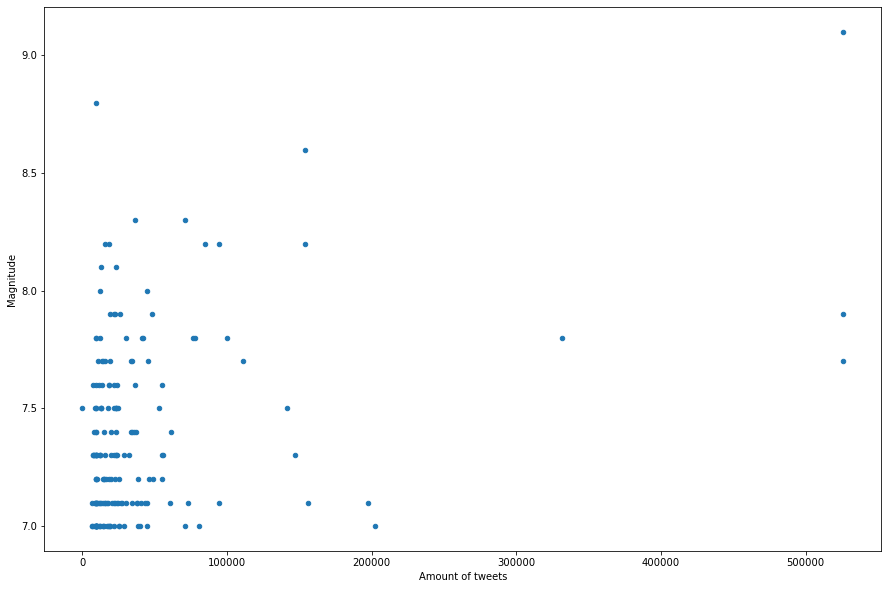

In [78]:
# Filter only for earthquakes above mag 6
ax = quakes[quakes[1]>=7].plot(x='tweetcount', y=1, kind='scatter', figsize=(15,10))
ax.set_xlabel('Amount of tweets')
ax.set_ylabel('Magnitude')

Text(0.5, 1.0, 'Correlation between magnitude and amount of tweets')

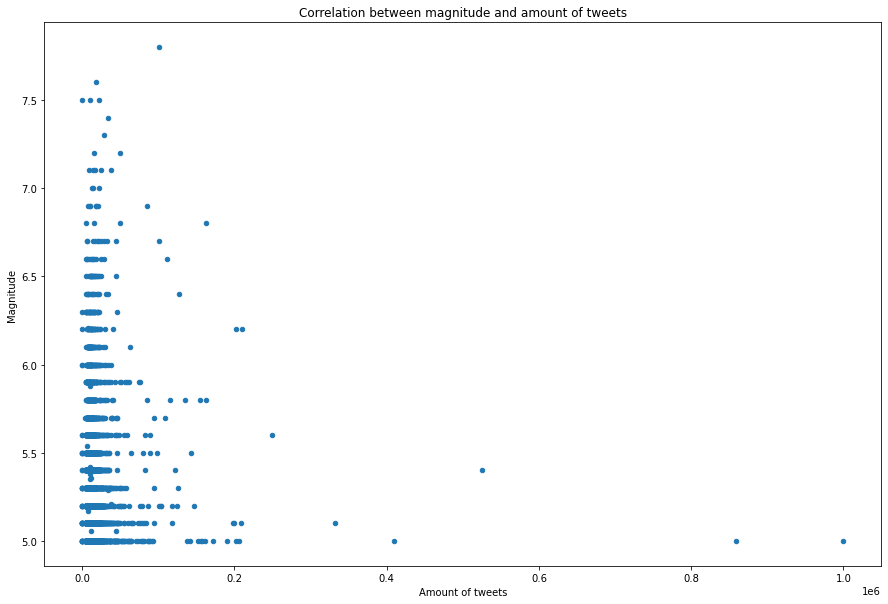

In [82]:
# Only take one earthquake per day (the heaviest)
ax = quakes.sort_values(2, ascending=False).groupby(quakes['date'].dt.floor('d')).first().plot(x='tweetcount', y=1, kind='scatter', figsize=(15,10))
ax.set_xlabel('Amount of tweets')
ax.set_ylabel('Magnitude')
ax.set_title('Correlation between magnitude and amount of tweets')